# Importing Data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

from pandas_datareader import data as pdr

In [4]:
# Load CSV
aapl = pd.read_csv("./AAPL_08to18.csv", header=0, index_col= 0, names=['Date','Open', 'High', 'Low', 'Close', 'Adj Close','Volume'], parse_dates=True)

# Times Series Data

In [5]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [6]:
# Inspect the first rows of August 2008 to August 2018
print(aapl.loc[pd.Timestamp('2008-08-07'):pd.Timestamp('2018-08-07')].head())

# Inspect the first rows of 2009 
print(aapl.loc['2009'].head())

# Inspect November 2009
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2008-08-07 and 2018-08-07
print(aapl.iloc[[22,43], [0, 3]])

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2008-08-07  23.244286  23.735714  23.071428  23.367144  15.757778  168093100
2008-08-08  23.408571  24.235714  23.392857  24.221428  16.333870  178499300
2008-08-11  24.295713  25.214285  24.238571  24.794285  16.720179  222826100
2008-08-12  24.788572  25.612858  24.787144  25.247143  17.025566  209069700
2008-08-13  25.425714  25.714285  25.128571  25.614286  17.273151  210586600
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2009-01-02  12.268572  13.005714  12.165714  12.964286   8.742546  186503800
2009-01-05  13.310000  13.740000  13.244286  13.511429   9.111515  295402100
2009-01-06  13.707143  13.881429  13.198571  13.288571   8.961231  322327600
2009-01-07  13.115714  13.214286  12.894286  13.001429   8.767592  188262200

In [7]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_msft`
print(monthly_aapl)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-06-22   46.451427   46.985714   46.054287   46.087143   31.079155   
2011-08-12   54.009998   54.234287   53.461430   53.855713   36.317924   
2010-12-15   45.714287   46.142857   45.598572   45.765713   30.862387   
2018-05-01  166.410004  169.199997  165.270004  169.100006  168.450439   
2009-03-20   14.584286   14.730000   14.367143   14.512857    9.786833   
2013-03-11   61.392857   62.715714   60.734287   62.552856   46.812347   
2011-02-02   49.207142   49.321430   49.078571   49.188572   33.170609   
2017-05-17  153.600006  154.570007  149.710007  150.250000  147.950150   
2015-02-18  127.629997  128.779999  127.449997  128.720001  121.365623   
2008-08-11   24.295713   25.214285   24.238571   24.794285   16.720179   
2010-09-08   37.111427   37.770000   37.014286   37.560001   25.328819   
2009-10-16   27.049999   27.194286   2

In [8]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

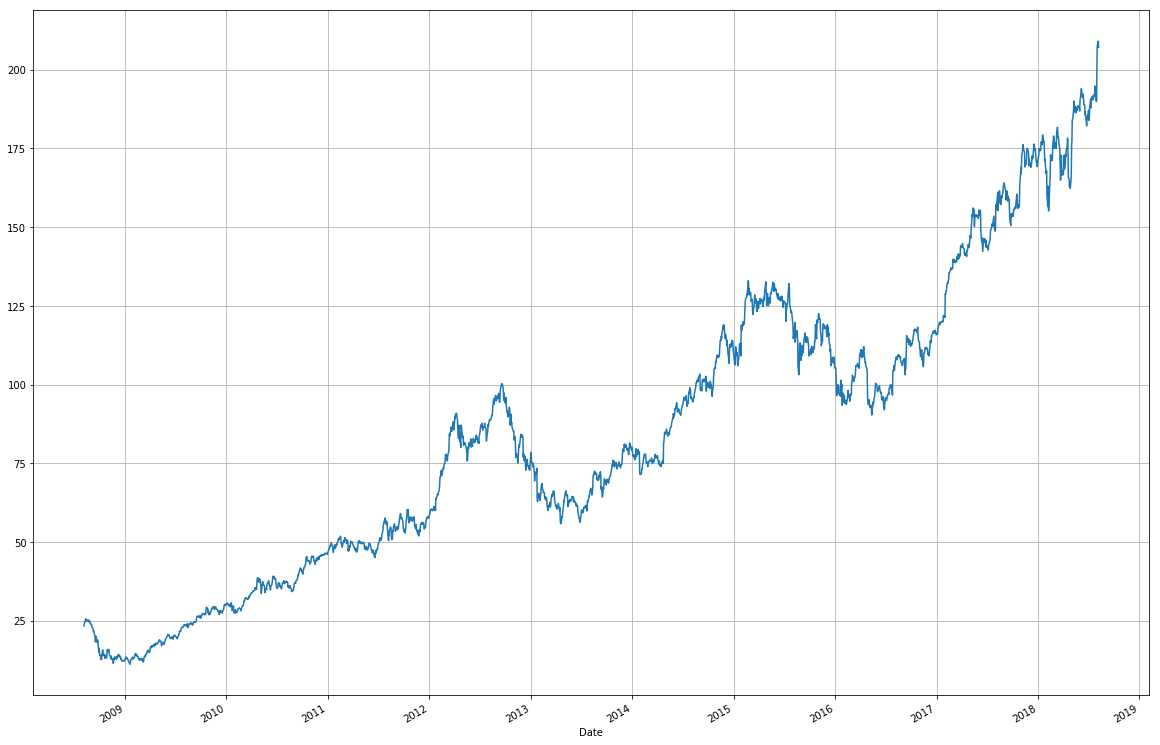

In [9]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(figsize=(20,14), grid=True)

# Show the plot
plt.show()

# Common Financial Analysis

## Returns

In [10]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2008-08-07   0.000000
2008-08-08   0.036559
2008-08-11   0.023651
2008-08-12   0.018265
2008-08-13   0.014542
2008-08-14   0.000112
2008-08-15  -0.019964
2008-08-18  -0.001992
2008-08-19  -0.010605
2008-08-20   0.013312
2008-08-21  -0.008815
2008-08-22   0.014344
2008-08-25  -0.023983
2008-08-26   0.006317
2008-08-27   0.005932
2008-08-28  -0.005325
2008-08-29  -0.024231
2008-09-02  -0.019702
2008-09-03   0.004633
2008-09-04  -0.034379
2008-09-05  -0.006451
2008-09-08  -0.014109
2008-09-09  -0.039513
2008-09-10  -0.000461
2008-09-11   0.006860
2008-09-12  -0.024304
2008-09-15  -0.057607
2008-09-16  -0.003420
2008-09-17  -0.086145
2008-09-18   0.048971
...               ...
2018-06-26   0.012406
2018-06-27  -0.001464
2018-06-28   0.007276
2018-06-29  -0.002102
2018-07-02   0.011182
2018-07-03  -0.017416
2018-07-05   0.008047
2018-07-06   0.013862
2018-07-09   0.013885
2018-07-10  -0.001207
2018-07-11  -0.012976
2018-07-12   0.016766
2018-07-13

In [11]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-31,-0.383084,-0.375216,-0.400370,-0.388585,-0.388585,1.088635
2009-04-30,-0.067551,-0.072966,-0.044537,-0.056683,-0.056683,-0.438513
2009-08-31,0.459443,0.445298,0.463688,0.454890,0.454890,-0.328186
2009-12-31,0.321576,0.319472,0.322456,0.318282,0.318282,0.037688
2010-04-30,0.148422,0.147889,0.147110,0.149188,0.149188,0.222424
2010-08-31,0.154834,0.156783,0.147932,0.152006,0.152006,0.146810
2010-12-31,0.181750,0.178179,0.193171,0.186034,0.186034,-0.323821
2011-04-30,0.140850,0.140693,0.139152,0.139658,0.139658,0.039957


In [12]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
2008-08-07        NaN
2008-08-08   0.036559
2008-08-11   0.023651
2008-08-12   0.018265
2008-08-13   0.014542
2008-08-14   0.000112
2008-08-15  -0.019964
2008-08-18  -0.001992
2008-08-19  -0.010605
2008-08-20   0.013312
2008-08-21  -0.008815
2008-08-22   0.014344
2008-08-25  -0.023983
2008-08-26   0.006317
2008-08-27   0.005932
2008-08-28  -0.005325
2008-08-29  -0.024231
2008-09-02  -0.019702
2008-09-03   0.004633
2008-09-04  -0.034379
2008-09-05  -0.006451
2008-09-08  -0.014109
2008-09-09  -0.039513
2008-09-10  -0.000461
2008-09-11   0.006860
2008-09-12  -0.024304
2008-09-15  -0.057607
2008-09-16  -0.003420
2008-09-17  -0.086145
2008-09-18   0.048971
...               ...
2018-06-26   0.012406
2018-06-27  -0.001464
2018-06-28   0.007276
2018-06-29  -0.002102
2018-07-02   0.011182
2018-07-03  -0.017416
2018-07-05   0.008047
2018-07-06   0.013862
2018-07-09   0.013885
2018-07-10  -0.001207
2018-07-11  -0.012976
2018-07-12   0.016766
2018-07-13

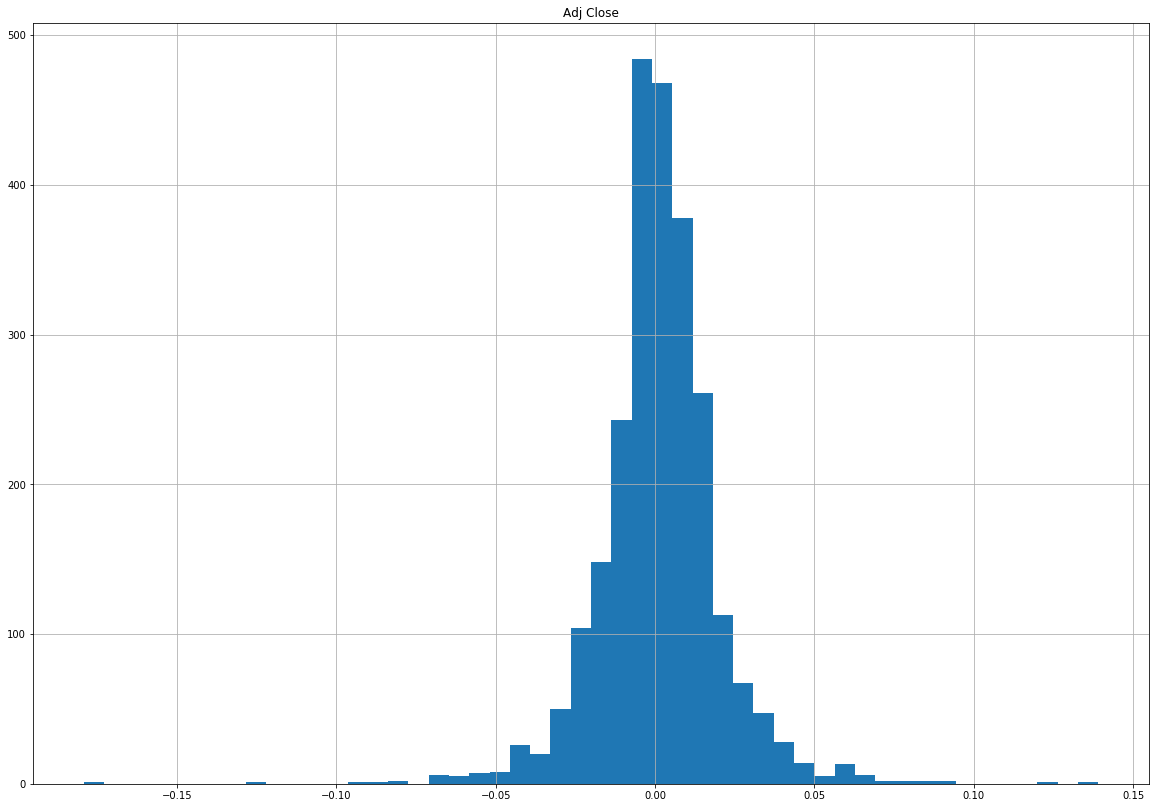

         Adj Close
count  2517.000000
mean      0.001202
std       0.018844
min      -0.179195
25%      -0.007268
50%       0.000943
75%       0.010405
max       0.139050


In [13]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(figsize=(20,14), bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [14]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2008-08-07        NaN
2008-08-08   1.036559
2008-08-11   1.061075
2008-08-12   1.080455
2008-08-13   1.096167
2008-08-14   1.096289
2008-08-15   1.074402
2008-08-18   1.072262
2008-08-19   1.060891
2008-08-20   1.075014
2008-08-21   1.065538
2008-08-22   1.080821
2008-08-25   1.054900
2008-08-26   1.061564
2008-08-27   1.067861
2008-08-28   1.062175
2008-08-29   1.036437
2008-09-02   1.016018
2008-09-03   1.020725
2008-09-04   0.985633
2008-09-05   0.979275
2008-09-08   0.965458
2008-09-09   0.927309
2008-09-10   0.926882
2008-09-11   0.933240
2008-09-12   0.910558
2008-09-15   0.858103
2008-09-16   0.855169
2008-09-17   0.781500
2008-09-18   0.819771
...               ...
2018-06-26  11.704061
2018-06-27  11.686927
2018-06-28  11.771964
2018-06-29  11.747215
2018-07-02  11.878578
2018-07-03  11.671696
2018-07-05  11.765618
2018-07-06  11.928712
2018-07-09  12.094345
2018-07-10  12.079749
2018-07-11  11.923001
2018-07-12  12.122902
2018-07-13

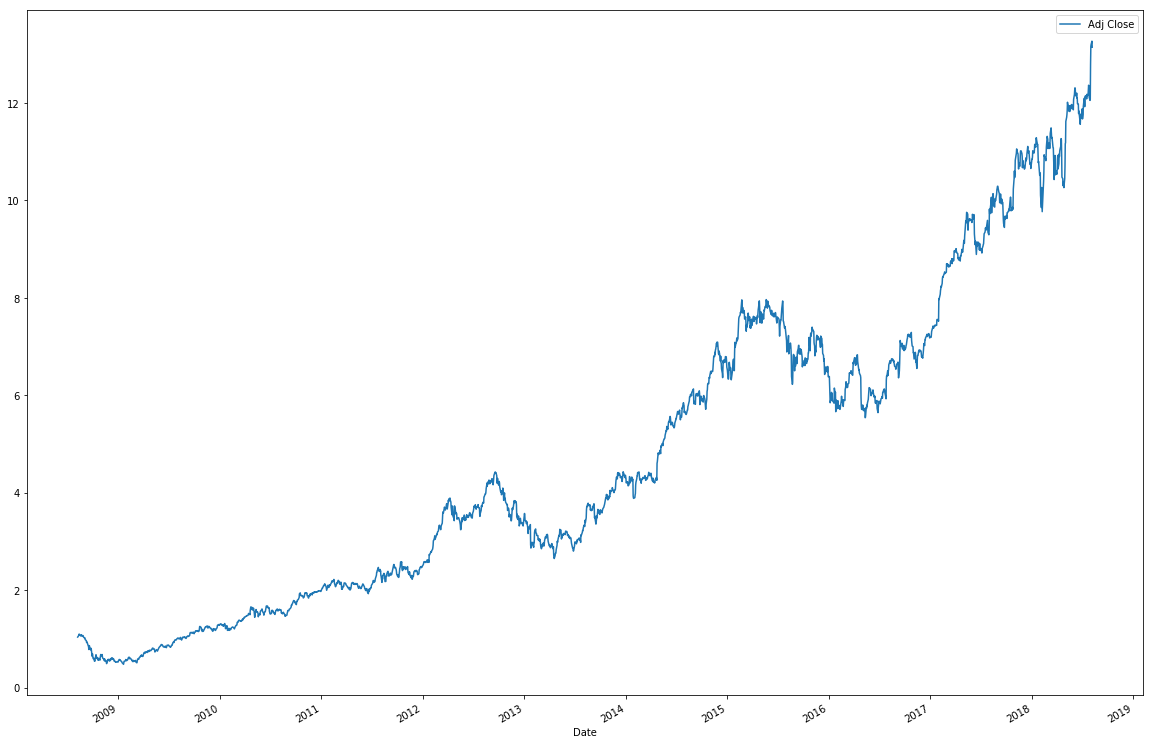

In [15]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(20,14))

# Show the plot
plt.show()

In [16]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2008-08-31   1.067651
2008-09-30   0.863504
2008-10-31   0.605269
2008-11-30   0.574314
2008-12-31   0.559660
2009-01-31   0.542734
2009-02-28   0.575131
2009-03-31   0.596106
2009-04-30   0.733759
2009-05-31   0.783450
2009-06-30   0.853018
2009-07-31   0.912870
2009-08-31   1.016571
2009-09-30   1.086915
2009-10-31   1.178892
2009-11-30   1.224674
2009-12-31   1.216326
2010-01-31   1.269886
2010-02-28   1.215356
2010-03-31   1.365842
2010-04-30   1.535419
2010-05-31   1.537332
2010-06-30   1.596536
2010-07-31   1.558660
2010-08-31   1.536487
2010-09-30   1.674212
2010-10-31   1.839789
2010-11-30   1.904922
2010-12-31   1.965433
2011-01-31   2.068717
...               ...
2016-03-31   6.354475
2016-04-30   6.505115
2016-05-31   5.818391
2016-06-30   5.924409
2016-07-31   6.043007
2016-08-31   6.632703
2016-09-30   6.834045
2016-10-31   7.133034
2016-11-30   6.822218
2016-12-31   7.084678
2017-01-31   7.409014
2017-02-28   8.310333
2017-03-31

In [17]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

import fix_yahoo_finance as yf
yf.pdr_override()

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2008, 8, 7), datetime.datetime(2018, 8, 7))
all_data.head()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2008-08-07  23.244286  23.735714  23.071428  23.367144  15.757778   
       2008-08-08  23.408571  24.235714  23.392857  24.221428  16.333870   
       2008-08-11  24.295713  25.214285  24.238571  24.794285  16.720179   
       2008-08-12  24.788572  25.612858  24.787144  25.247143  17.025566   
       2008-08-13  25.425714  25.714285  25.128571  25.614286  17.273151   

                      Volume  
Ticker Date                   
AAPL   2008-08-07  168093100  
       2008-08-08  178499300  
       2008-08-11  222826100  
       2008-08-12  209069700  
       2008-08-13  210586600

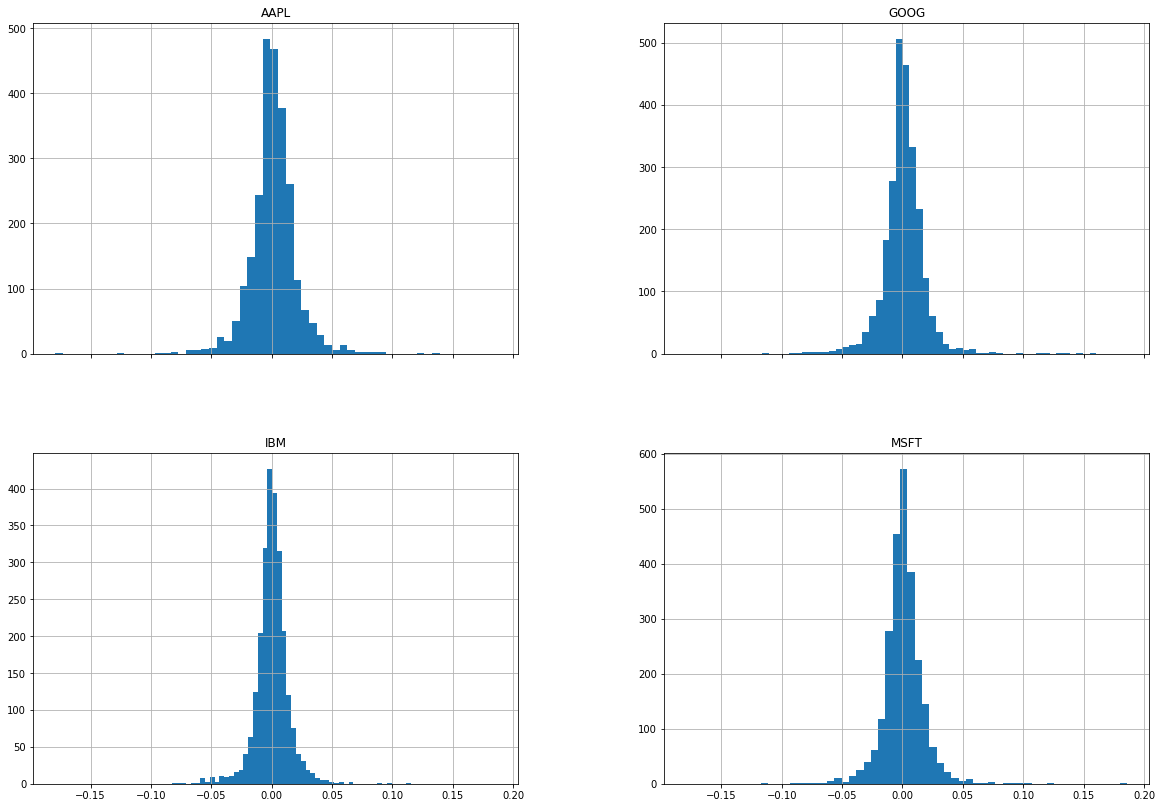

In [54]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(20,14))

# Show the resulting plot
plt.show()

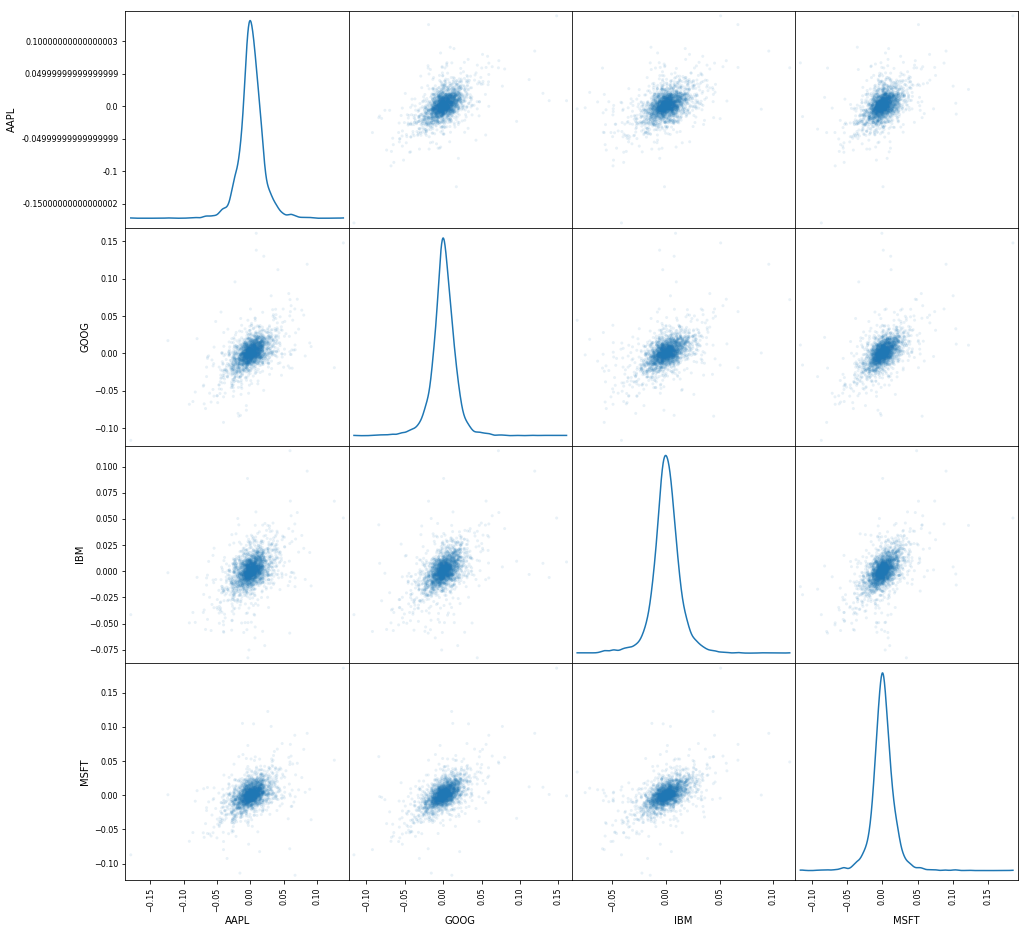

In [19]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(16,16))

# Show the plot
plt.show()

## Moving Windows

In [20]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2018-07-25    189.164250
2018-07-26    189.332000
2018-07-27    189.434750
2018-07-30    189.426500
2018-07-31    189.388000
2018-08-01    189.592750
2018-08-02    189.928000
2018-08-03    190.291250
2018-08-06    190.725500
2018-08-07    191.122501
Name: Adj Close, dtype: float64

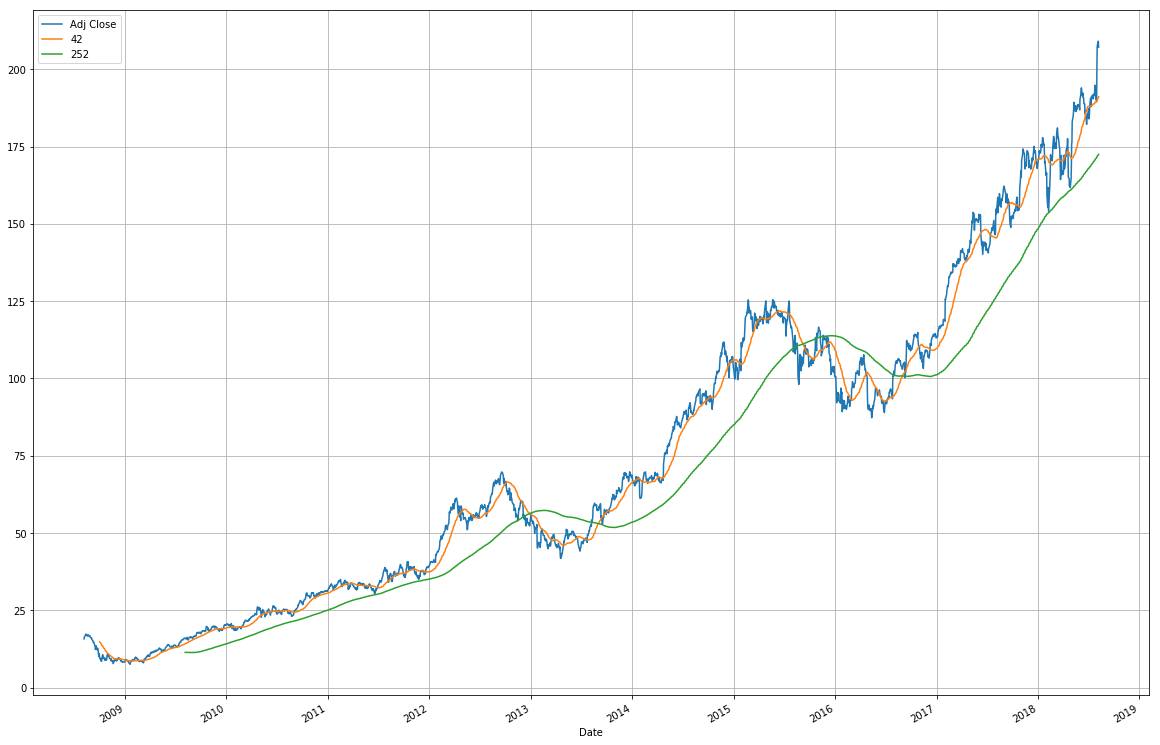

In [21]:
# Short moving window rolling mean, Two Months of Trading Day's
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean, One Year of Trading Day's
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot(figsize=(20,14), grid=True)

plt.show()

## Volatility Calculation

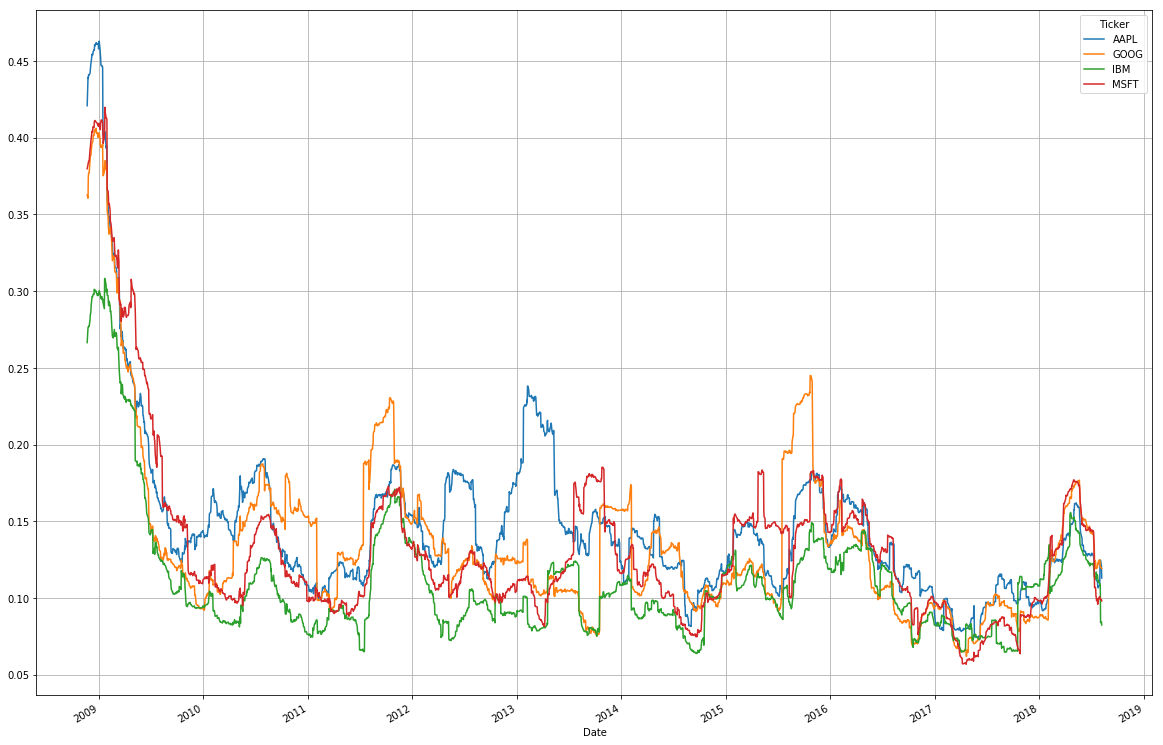

In [22]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(20, 14), grid=True)

# Show the plot
plt.show()

## Ordinary Least-Squares Regression (OLS)

In [23]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas import tseries
from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

/Users/jeffreyplindow/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     743.7
Date:                Wed, 08 Aug 2018   Prob (F-statistic):          1.12e-143
Time:                        11:41:28   Log-Likelihood:                 6988.8
No. Observations:                2517   AIC:                        -1.397e+04
Df Residuals:                    2515   BIC:                        -1.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.677      0.4

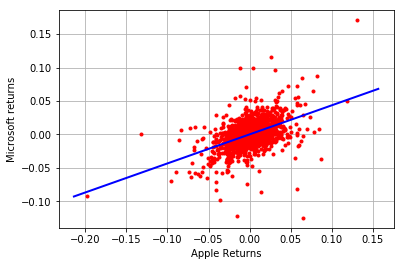

In [24]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.',)

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2,)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

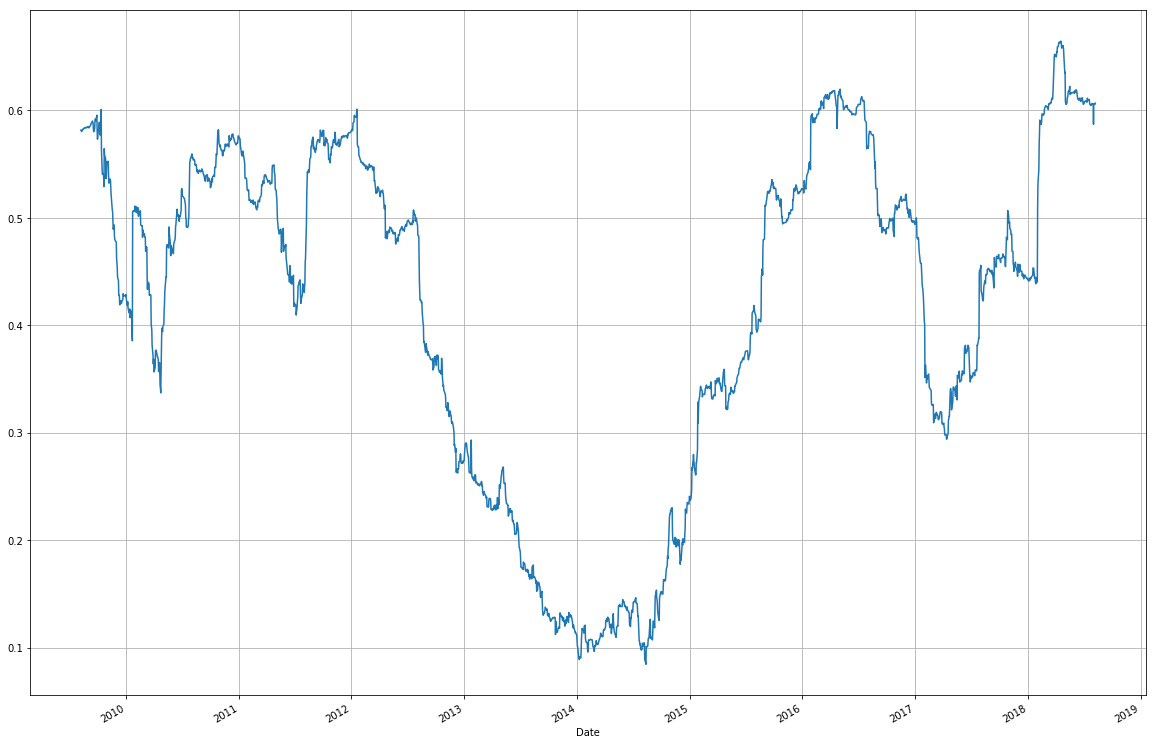

In [25]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot(figsize=(20,14), grid=True)
plt.show()

## Building A Trading Strategy With Python

In [26]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

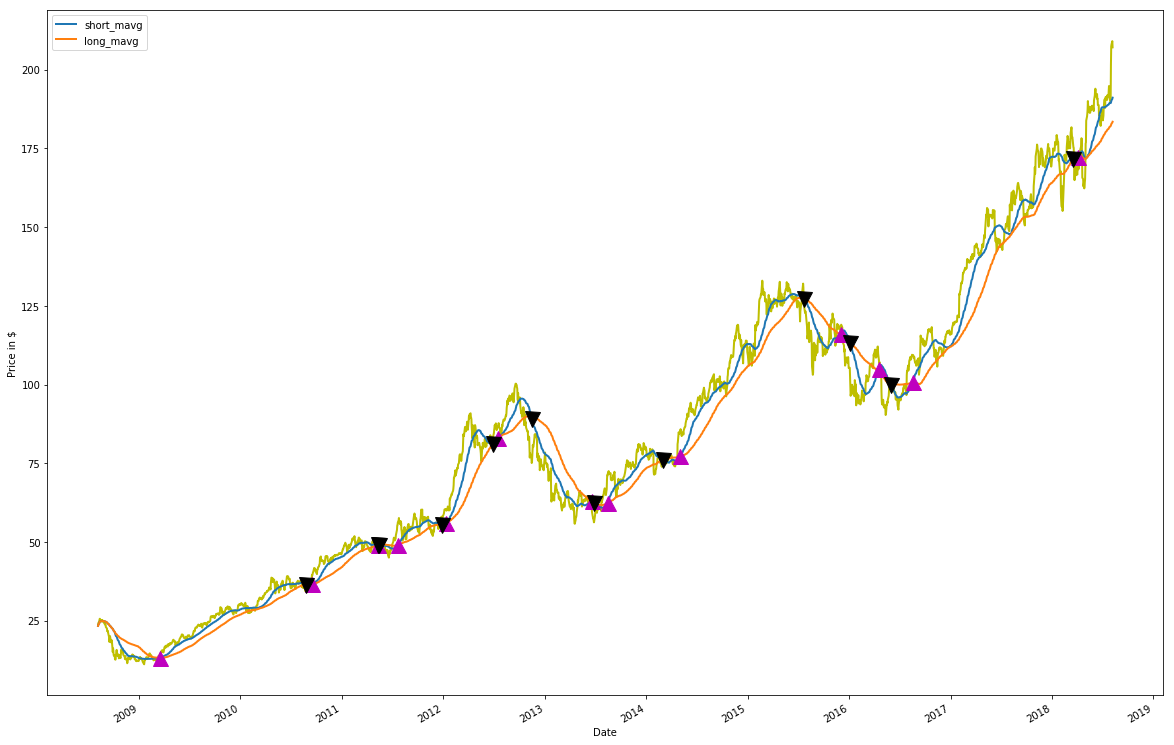

In [27]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(figsize=(20,14), ax=ax1, color='y', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=15, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=15, color='k')
         
# Show the plot
plt.show()

## Backtesting A Strategy

### Implementation Of A Simple Backtester With Pandas

In [28]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

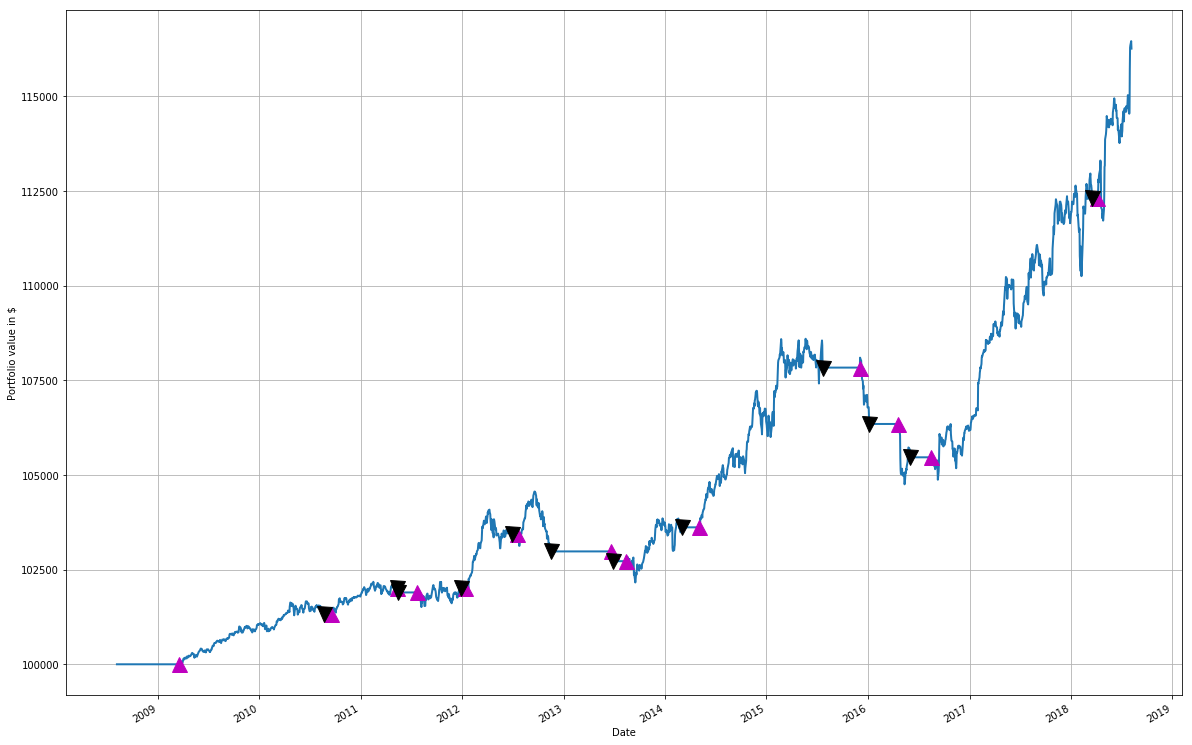

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(figsize=(20,14), grid=True, ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=15, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=15, color='k')

# Show the plot
plt.show()

## Evaluating Moving Average Crossover Strategy

### Sharpe Ratio

In [30]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.9516563688248107


## Maximum Drawdown

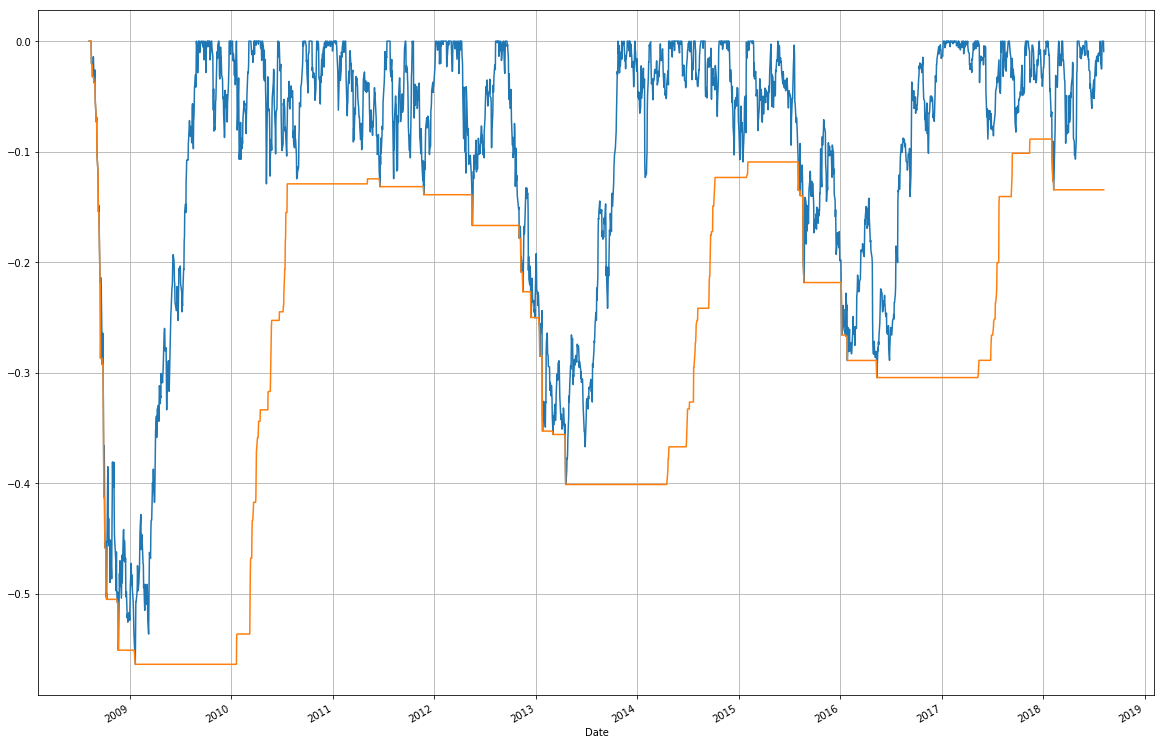

In [31]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot(figsize=(20,14), grid=True)
max_daily_drawdown.plot(figsize=(20,14), grid=True)

# Show the plot
plt.show()

## Compound Annual Growth Rate (CAGR)

In [32]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.2889936747180535


# Scikit - Learn

## Quantifying Linear Regression

In [73]:
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd

# Generate some data
aapl = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)

# Create a linear model
model = LinearRegression()

# Fit (Train) our model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Quantifying our Model
Mean Squared Error (MSE)

R2 Score

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 11.933040779746149
R-squared (R2 ): 0.903603363418708


In [75]:
# Overall Score for the model
model.score(X, y)

0.903603363418708

## Validation

## Testing and Training Data

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [77]:
X_train

array([[ 0.3130677 ],
       [ 0.12167502],
       [-0.85409574],
       [ 0.44386323],
       [ 0.76103773],
       [ 1.86755799],
       [ 0.97873798],
       [ 1.49407907],
       [ 1.76405235],
       [-0.97727788],
       [ 1.45427351],
       [-0.20515826],
       [ 0.95008842],
       [ 0.14404357],
       [-0.10321885]])

In [78]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
model.score(X_test, y_test)

0.9252522435044104